In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

num_species = 20
num_gens = 24

fitness = []

for spec in range(num_species):
    for gen in range(num_gens+1):
        with open(f"phenotypes/pheno-gen-{gen}-species-{spec}-hidden.json") as f:
            pheno = json.load(f)
            fitness.append(pheno)
        with open(f"phenotypes/pheno-gen-{gen}-species-{spec}-no-hidden.json") as f:
            pheno = json.load(f)
            fitness.append(pheno)
        

In [2]:
import pandas as pd
df = pd.DataFrame(fitness)

df[["species", "hidden"]] = df["species"].str.split("-", 1, expand=True)
df["hidden"] = df["hidden"] == "hidden"

cols = df.columns.drop(["sense_hist", "leg_hist", "hidden", "w1", "w2", "w3"])

df[cols] = df[cols].apply(pd.to_numeric)
df

,species,gen,x,y,z,fitness,sense_hist,leg_hist,w1,w2,w3,hidden
0,0,0,0.924008,-0.145229,1.029091,16,"[0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[0.1053935203638312, 0.010808054870240946], [...","[[-0.6087275072519047, -0.581596439425734, -0....","[[0.6722267530455923, -0.09621041646455453, 0....",True
1,0,0,-0.719374,-1.432749,1.041230,34,"[0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 0.0, 2.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[-0.13270939035043772, 0.8269508648285604], [...","[[-0.6056256472035633, -0.3388359889593582, -0...","[[-0.23099977829023555, -0.07839133182779578, ...",False
2,0,1,-0.748249,-1.197358,1.058501,20,"[0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[0.1053935203638312, 0.010808054870240946], [...","[[-0.6087275072519047, -0.581596439425734, -0....","[[0.6722267530455923, -0.09621041646455453, 0....",True
3,0,1,-0.356912,-2.483793,0.992397,44,"[0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 2.0, 2.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[-0.13270939035043772, 0.8269508648285604], [...","[[-0.6056256472035633, -0.3388359889593582, -0...","[[-0.23099977829023555, -0.07839133182779578, ...",False
4,0,2,-0.748249,-1.197358,1.058501,20,"[0.0, 4.0, 4.0, 4.0, 0.0, 4.0, 2.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[0.1053935203638312, 0.010808054870240946], [...","[[-0.6087275072519047, -0.581596439425734, -0....","[[0.6722267530455923, -0.09621041646455453, 0....",True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,19,22,-1.066912,-1.551548,0.919177,83,"[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[-0.2135423270644523, 0.9295583565441932], [0...","[[-0.4618090172225502, 0.396218788915494, -0.9...","[[-0.37244572366264306, -0.05284598442919952, ...",False
996,19,23,1.356676,-2.237572,1.056878,20,"[0.0, 4.0, 4.0, 2.0, -2.0, 0.0, 2.0, 0.0, 2.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[0.1743406861706207, -0.06403585411555768], [...","[[-0.8323843525542876, -0.00013464026429343967...","[[-0.588119991169451, 0.6295874426961066, -0.1...",True
997,19,23,-1.259302,-0.907947,0.899535,98,"[0.0, 4.0, 4.0, 4.0, 4.0, 4.0, 0.0, 4.0, 4.0, ...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[-0.2135423270644523, 0.9295583565441932], [0...","[[-0.4618090172225502, 0.396218788915494, -0.9...","[[-0.37244572366264306, -0.05284598442919952, ...",False
998,19,24,-0.134631,-0.461158,1.144065,49,"[0.0, 4.0, 4.0, 0.0, -2.0, 0.0, 2.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 1.0, 1.0], [...","[[0.1743406861706207, -0.06403585411555768], [...","[[-0.8323843525542876, -0.00013464026429343967...","[[-0.588119991169451, 0.6295874426961066, -0.1...",True


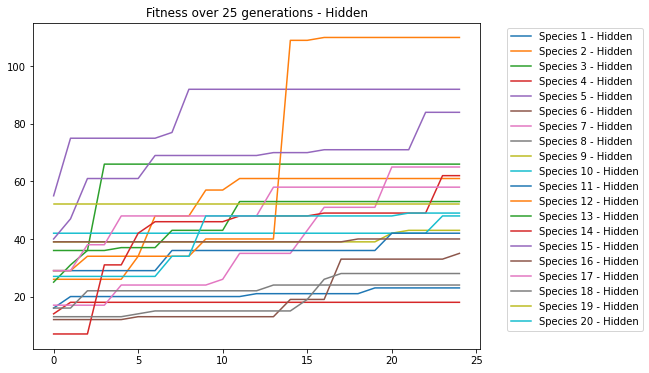

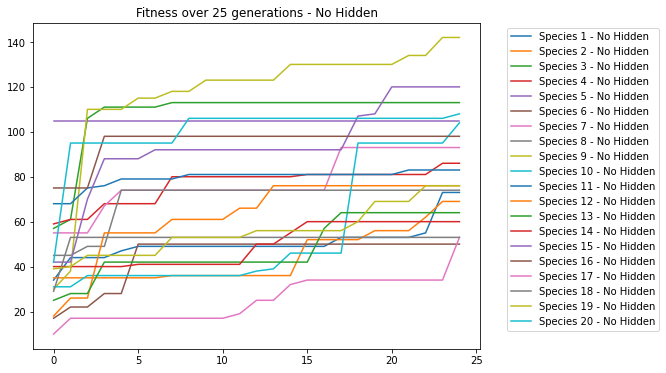

In [3]:
# df[df.species == 3][["fitness", "gen"]].plot(x="gen", y="fitness")
plt.rcParams["figure.figsize"] = (8,6)

for hidden in [True, False]:
    for i in range(num_species):
        arr = df[(df.species == i) & (df.hidden==hidden)][["gen","fitness"]].to_numpy()
        arr = np.maximum.accumulate(arr, axis=0)
        plt.plot(arr[:,0], arr[:,1], label=f"Species {i + 1} - {'Hidden' if hidden else 'No Hidden'}")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(f"Fitness over {num_gens + 1} generations - " + ("Hidden" if hidden else "No Hidden"))
    plt.show()

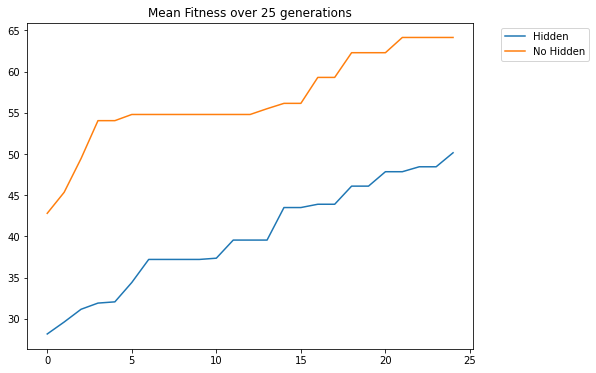

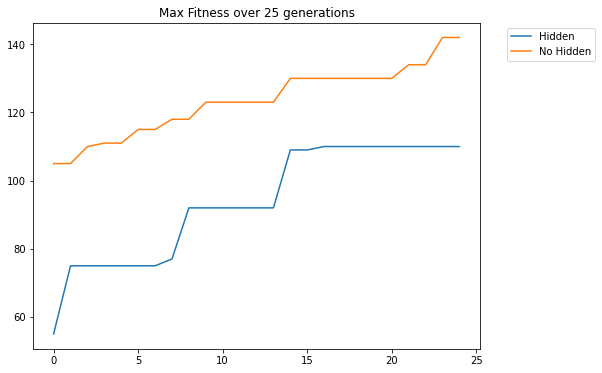

In [9]:
# df[df.species == 3][["fitness", "gen"]].plot(x="gen", y="fitness")
plt.rcParams["figure.figsize"] = (8,6)

for hidden in [True, False]:
    frame = df[(df.hidden==hidden)][["gen","fitness"]]
    arr = frame.groupby("gen").mean().to_numpy()
    
    arr = np.maximum.accumulate(arr, axis=0)
    
    plt.plot(arr, label='Hidden' if hidden else 'No Hidden')

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(f"Mean Fitness over {num_gens + 1} generations")
plt.show()

for hidden in [True, False]:
    frame = df[(df.hidden==hidden)][["gen","fitness"]]
    arr = frame.groupby("gen").max().to_numpy()
    
    arr = np.maximum.accumulate(arr, axis=0)
    
    plt.plot(arr, label='Hidden' if hidden else 'No Hidden')

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.title(f"Max Fitness over {num_gens + 1} generations")
plt.show()

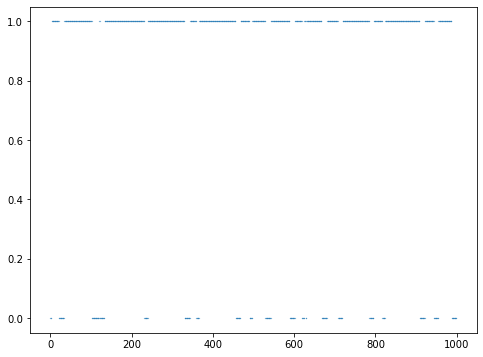

In [5]:
lh = np.asarray(df["leg_hist"][490])
mask = lh[:,0] == -1

foot_down = np.zeros(mask.shape)
# mask
foot_down[mask] = 1
plt.scatter(np.arange(0, len(mask)), foot_down, s=0.05)

In [6]:
# mask = df[["species", "gen", "leg_hist", "fitness"]].fitness > 100
# df[mask]
most_fit_idxs = df.nlargest(3, "fitness").index.to_numpy()

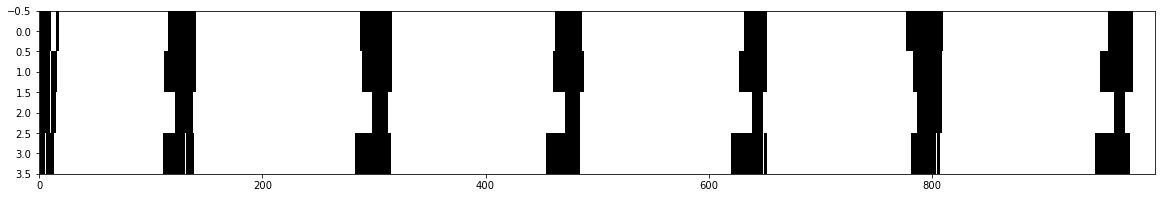

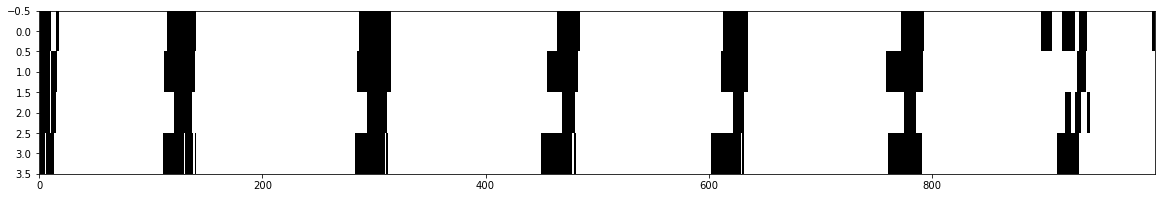

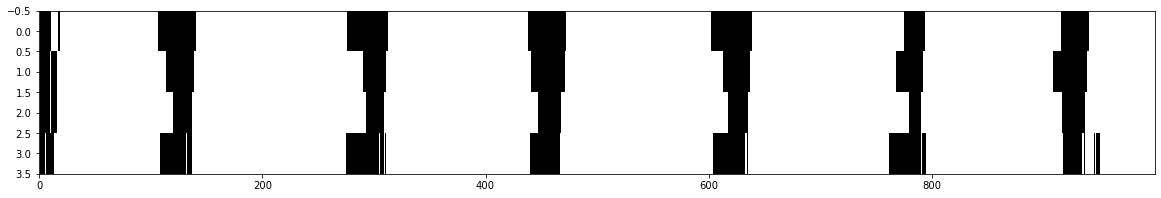

In [7]:
plt.rcParams["figure.figsize"] = (20,3)

for idx in most_fit_idxs:
    lh = np.asarray(df["leg_hist"][idx]).T
    data = lh > 0
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(data, aspect='auto', cmap="binary", interpolation='nearest')

    plt.show()

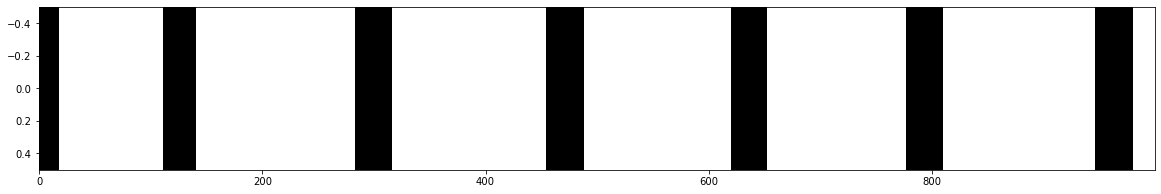

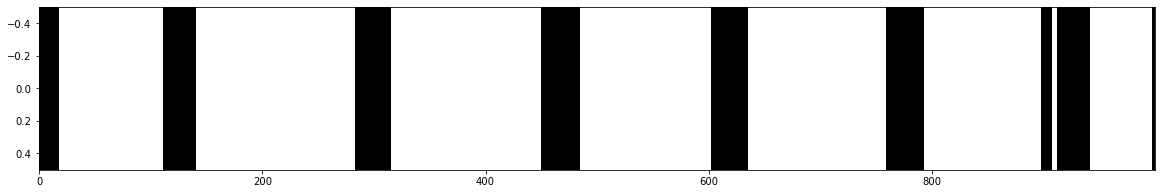

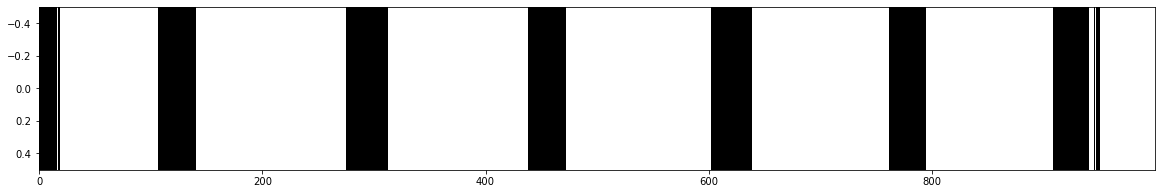

In [8]:
plt.rcParams["figure.figsize"] = (20,3)

for idx in most_fit_idxs:
    lh = np.asarray(df["sense_hist"][idx]).T
    data = lh > -3
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    data = data.reshape((1000, 1)).T
    ax.imshow(data, aspect='auto', cmap="binary", interpolation='nearest')

    plt.show()